In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as z
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bartlett
from factor_analyzer.factor_analyzer import calculate_kmo as kmo

In [7]:
fae_df = pd.read_csv('Dataset/Factor_Analysis_Example.csv')

In [8]:
fae_df.head()

,Respondent,x1,x2,x3,x4,x5,x6
0,1,7,3,6,4,2,4
1,2,1,3,2,4,5,4
2,3,6,2,7,4,1,3
3,4,4,5,4,6,2,5
4,5,1,2,2,3,6,2


In [9]:
fae_df = fae_df.iloc[:,1:]

In [11]:
fae_df_z = z().fit_transform(fae_df)

In [15]:
fae_df_z=pd.DataFrame(fae_df_z,columns=fae_df.columns)

In [21]:
round(fae_df_z.corr(),3)

,x1,x2,x3,x4,x5,x6
x1,1.000,-0.053,0.873,-0.086,-0.858,0.004
x2,-0.053,1.000,-0.155,0.572,0.020,0.640
x3,0.873,-0.155,1.000,-0.248,-0.778,-0.018
x4,-0.086,0.572,-0.248,1.000,-0.007,0.640
x5,-0.858,0.020,-0.778,-0.007,1.000,-0.136
x6,0.004,0.640,-0.018,0.640,-0.136,1.000


In [26]:
kmo_all,kmo_model = kmo(fae_df_z)

In [27]:
kmo_all

array([0.60452899, 0.68279015, 0.66374766, 0.62090254, 0.75647187,
       0.54447484])

In [28]:
kmo_model

0.6446648121225478

In [29]:
bartlett(fae_df_z)

(116.6363827530697, 3.778285625642501e-18)

In [30]:
bartlett?

In [33]:
FA_model = FactorAnalyzer(n_factors=6, rotation=None)

In [34]:
FA_model = FA_model.fit(fae_df_z)

In [36]:
eigen_values, vectors = FA_model.get_eigenvalues()

In [37]:
eigen_values

array([2.73118833, 2.21811927, 0.44159791, 0.34125765, 0.18262823,
       0.08520861])

In [38]:
vectors

array([ 2.64317969e+00,  1.94679538e+00,  1.72637406e-01,  1.05684566e-01,
        2.25549677e-02, -8.03943469e-07])

In [41]:
x = range(1,7)

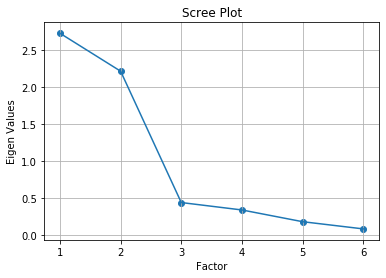

In [42]:
plt.scatter(x,eigen_values)
plt.plot(x,eigen_values)
plt.xlabel('Factor')
plt.ylabel('Eigen Values')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [47]:
fae_df_z_2 = FactorAnalyzer(rotation = 'varimax', n_factors=2)
fae_df_z_2 = fae_df_z_2.fit(fae_df_z)

In [48]:
fae_df_z_2 = pd.DataFrame(fae_df_z_2.loadings_)
fae_df_z_2

,0,1
0,0.963405,-0.035314
1,-0.050313,0.747407
2,0.901052,-0.154550
3,-0.086455,0.768989
4,-0.884867,-0.074830
5,0.078878,0.847558


In [51]:
fae_df_z_2 = FactorAnalyzer(rotation = 'varimax', n_factors=2)
fae_df_z_2 = fae_df_z_2.fit(fae_df_z)
scores = fae_df_z_2.fit_transform(fae_df_z)
df = pd.DataFrame(scores)

In [52]:
df

,0,1
0,1.334788,-0.206786
1,-1.299459,-0.266587
2,1.155548,-0.866505
3,0.144256,0.946717
4,-1.480144,-1.417752
5,1.009562,-0.258146
6,0.462932,-0.937282
7,1.184946,-0.126602
8,-0.800295,-0.575130
9,-1.106550,1.415296


# Question 2

In [104]:
FA_2 = pd.read_excel('Dataset/Factor_Analysis_Ex1.xlsx')
FA_2.head()

,SL No,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
0,1,2,7,1,4,7,8,5,9,5,...,7,9,9,5,5,5,7,5,5,8
1,2,3,8,2,7,5,8,4,8,5,...,2,7,6,6,4,3,7,2,2,7
2,3,6,6,2,5,1,8,2,9,2,...,5,8,7,4,5,5,7,6,2,8
3,4,3,7,6,7,8,8,2,8,3,...,3,8,4,7,6,6,6,4,3,7
4,5,7,3,3,5,8,6,7,2,3,...,6,6,7,5,5,3,3,7,5,5


In [105]:
FA_2.set_index(FA_2['SL No'])

,SL No,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
SL No,,,,,,,,,,,,,,,,,,,,,
1,1,2,7,1,4,7,8,5,9,5,...,7,9,9,5,5,5,7,5,5,8
2,2,3,8,2,7,5,8,4,8,5,...,2,7,6,6,4,3,7,2,2,7
3,3,6,6,2,5,1,8,2,9,2,...,5,8,7,4,5,5,7,6,2,8
4,4,3,7,6,7,8,8,2,8,3,...,3,8,4,7,6,6,6,4,3,7
5,5,7,3,3,5,8,6,7,2,3,...,6,6,7,5,5,3,3,7,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,3,6,3,7,5,6,4,7,3,...,4,7,4,7,5,5,6,6,3,7
237,237,2,8,3,7,2,7,2,7,2,...,4,6,4,7,2,4,7,3,2,7
238,238,4,9,3,9,7,7,5,7,5,...,3,5,2,7,3,3,7,2,1,6


In [106]:
del FA_2['SL No']

In [110]:
del FA_2[['distant','talkative']]

TypeError: '['distant', 'talkative']' is an invalid key

In [73]:
#Satndardize the data
FA_2 = FA_2.iloc[:,1:]
#FA_2_new =del(FA_2['SL No'])

In [95]:
FA_2_new =FA_2.drop(['SL No'],axis =1)

In [107]:
FA_2_new.columns

Index(['distant', 'talkative', 'careless', 'hardworking', 'anxious',
       'agreeble', 'tense', 'kind', 'opposing', 'relaxed', 'disorganized',
       'outgoing', 'approving', 'shy', 'disciplined', 'harsh', 'perseverance',
       'friendly', 'worrying', 'responsible', 'contradictory', 'sociable',
       'lazy', 'cooperative', 'quiet', 'organized', 'critical', 'lax',
       'laidbck', 'withdraw', 'giving up', 'easygoing'],
      dtype='object')

In [74]:
FA_2_z = z().fit_transform(FA_2)
FA_2_z = pd.DataFrame(FA_2_z,columns=FA_2.columns)

In [75]:
FA_2_z.corr()

,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,relaxed,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
distant,1.000000,-0.442931,0.177883,-0.155533,0.230795,-0.118712,0.237187,-0.204902,0.196046,-0.141484,...,0.154780,-0.262293,0.447928,-0.173453,0.184974,0.048552,-0.044438,0.633871,0.320608,-0.114820
talkative,-0.442931,1.000000,0.068221,0.165458,-0.103962,0.095631,-0.105728,0.120883,0.082707,0.037246,...,-0.071084,0.082219,-0.592839,0.023266,-0.024602,0.012484,0.072252,-0.507161,-0.244203,0.196012
careless,0.177883,0.068221,1.000000,-0.243745,0.179620,0.009617,0.124876,-0.300326,0.184929,-0.000034,...,0.412558,-0.194588,0.053043,-0.539153,0.045116,0.266069,0.102753,0.231474,0.293219,-0.022502
hardworking,-0.155533,0.165458,-0.243745,1.000000,0.057372,0.038558,0.117225,0.218891,-0.085076,-0.141424,...,-0.499490,0.149235,-0.190180,0.474052,0.106867,-0.303603,-0.128875,-0.157767,-0.310338,-0.096873
anxious,0.230795,-0.103962,0.179620,0.057372,1.000000,0.062428,0.679933,0.026274,0.189791,-0.418672,...,0.132115,-0.132981,0.271264,-0.073419,0.201072,-0.032861,-0.264194,0.279926,0.272296,-0.264102
agreeble,-0.118712,0.095631,0.009617,0.038558,0.062428,1.000000,-0.069040,0.435809,-0.195656,0.292101,...,-0.029068,0.509043,0.080694,-0.011305,-0.209302,0.094181,0.188795,-0.146252,-0.096044,0.256926
tense,0.237187,-0.105728,0.124876,0.117225,0.679933,-0.069040,1.000000,-0.067334,0.228030,-0.556806,...,0.131651,-0.194436,0.236663,-0.025533,0.243871,-0.139022,-0.375896,0.247543,0.268895,-0.352418
kind,-0.204902,0.120883,-0.300326,0.218891,0.026274,0.435809,-0.067334,1.000000,-0.188612,0.159134,...,-0.218331,0.450795,0.005691,0.329356,-0.075599,-0.076495,0.017993,-0.233614,-0.248133,0.191396
opposing,0.196046,0.082707,0.184929,-0.085076,0.189791,-0.195656,0.228030,-0.188612,1.000000,-0.104797,...,0.141039,-0.278206,0.034142,-0.120949,0.446464,0.018599,-0.040385,0.190196,0.080769,-0.081256
relaxed,-0.141484,0.037246,-0.000034,-0.141424,-0.418672,0.292101,-0.556806,0.159134,-0.104797,1.000000,...,0.076389,0.248877,-0.070753,-0.053560,-0.190310,0.284129,0.590268,-0.154887,-0.182784,0.461775


In [76]:
kmo_all,kmo_model = kmo(FA_2_z)

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [77]:
round(kmo_model,3)

0.842

In [78]:
bartlett(FA_2_z)

(4039.9416267405313, 0.0)

In [79]:
FA_2_Z_model = FactorAnalyzer(rotation=None, n_factors=6)
FA_2_Z_model = FA_2_Z_model.fit(FA_2_z)

In [80]:
ev , vectors = FA_2_Z_model.get_eigenvalues()

In [81]:
ev = pd.DataFrame(ev, columns=['Variance'])

In [82]:
ev

,Variance
0,7.240707
1,4.525090
2,3.124057
3,2.333589
4,1.878361
5,1.194064
6,0.926864
7,0.855380
8,0.796846
9,0.712879


In [84]:
x = range(len(FA_2_z.columns))
x

range(0, 32)

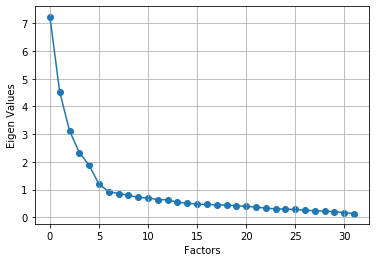

In [86]:
plt.scatter(x,ev['Variance'])
plt.plot(x,ev['Variance'])
plt.xlabel('Factors')
plt.ylabel('Eigen Values')
plt.grid()
plt.show()

In [87]:
fa_weight = FactorAnalyzer(rotation='varimax', n_factors=6)
fa_weight = fa_weight.fit(FA_2_z)
myloadings = pd.DataFrame(fa_weight.loadings_)

In [89]:
fa_weight = FactorAnalyzer(rotation='varimax', n_factors=6)
fa_weight = fa_weight.fit_transform(FA_2_z)

In [90]:
fa_weight

array([[ 1.06911131, -1.68411377,  0.67957352,  2.70913527,  0.68637186,
        -1.26380498],
       [-0.4549629 ,  0.1028371 , -0.41806532,  0.91005412,  0.27100749,
         0.0895541 ],
       [ 0.78284168, -0.59604181, -1.46750232,  1.54469562, -0.70581672,
         0.32490475],
       ...,
       [-1.70456594,  0.63495041,  0.00698182,  0.07711384,  0.57213226,
         0.18892208],
       [-0.22460056,  1.30969303,  0.52970415, -0.31076384, -0.36447367,
         0.2296572 ],
       [ 1.23292252,  0.67080285,  1.91330844,  0.41049103,  2.14984363,
         1.77925947]])